# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Exploração de outras bases de dados** <br/>

In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("datasets/MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2017.shape

(537436, 150)

In [2]:
enade2017.columns[0:]

Index([u'NU_ANO', u'CO_IES', u'CO_CATEGAD', u'CO_ORGACAD', u'CO_GRUPO',
       u'CO_CURSO', u'CO_MODALIDADE', u'CO_MUNIC_CURSO', u'CO_UF_CURSO',
       u'CO_REGIAO_CURSO',
       ...
       u'QE_I72', u'QE_I73', u'QE_I74', u'QE_I75', u'QE_I76', u'QE_I77',
       u'QE_I78', u'QE_I79', u'QE_I80', u'QE_I81'],
      dtype='object', length=150)

In [3]:
'''
nota geral: 0-98 
questão08: Qual a renda total de sua família, incluindo seus rendimentos?
A = Até 1,5 salário mínimo (até R$ 1.405,50).
B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

i05 escolaridade da mae
A = Nenhuma.
B = Ensino fundamental: 1º ao 5º ano (1ª a 4ª série).
C = Ensino fundamental: 6º ao 9º ano (5ª a 8ª série).
D = Ensino médio.
E = Ensino Superior - Graduação.
F = Pós-graduação.

'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_GRUPO', 'QE_I08', 'CO_IES', 'QE_I05', 'QE_I17', 'CO_REGIAO_CURSO'])

In [4]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')

#observe os NaN (not a number)

In [5]:
'''No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])



In [6]:
#Calcula a média de um curso especifico
#Código da área de enquadramento do curso no Enade == ciencia da computacao

ccomp = tabela[tabela['CO_GRUPO']==4004]

In [7]:
ccomp['NT_GER'].describe()

count    8489.000000
mean       43.262775
std        13.633212
min         0.000000
25%        33.700000
50%        42.300000
75%        52.400000
max        95.100000
Name: NT_GER, dtype: float64

In [8]:
#somente as notas de quem respondeu a questão sobre a renda
ccomp=ccomp.loc[(ccomp['QE_I08'].notnull())]

In [9]:
ccomp=ccomp.loc[(ccomp['QE_I05'].notnull())]

In [10]:
import matplotlib.pyplot as plt


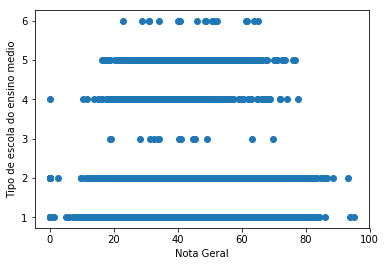

In [11]:
# Verificar o impacto do ensino médio no ensino superior
"""
A = Todo em escola pública.
B = Todo em escola privada (particular).
C = Todo no exterior.
D = A maior parte em escola pública.
E = A maior parte em escola privada (particular).
F = Parte no Brasil e parte no exterior.
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
ccomp['QE_I17'] = ccomp['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
ccomp=ccomp.loc[(ccomp['QE_I17'].notnull())]
plt.scatter( ccomp.NT_GER, ccomp.QE_I17 )
plt.xlabel('Nota Geral')
plt.ylabel('Tipo de escola do ensino medio')
plt.show()


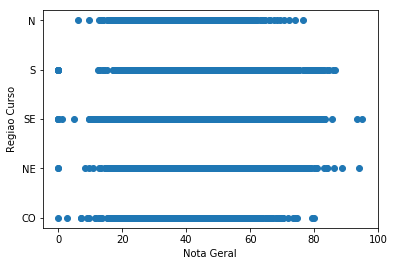

,count,mean,std,min,25%,50%,75%,max
CO_REGIAO_CURSO,,,,,,,,
CO,607.0,41.387974,13.659021,0.0,32.10,41.1,51.1,79.9
N,413.0,38.421792,12.378746,6.1,29.70,37.0,45.1,76.6
NE,1615.0,44.043096,13.429269,0.0,34.65,43.3,52.6,93.9
S,1587.0,46.289351,13.732373,0.0,36.80,45.8,55.6,86.5
SE,4186.0,42.687984,13.528741,0.0,33.30,41.5,51.9,95.1


In [12]:
# Verificar os resultados a partir da região do país
"""
N Nordeste
S Sul
SE Sudeste
NE Nordeste
CO Centro-Oeste
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
ccomp['CO_REGIAO_CURSO'] = ccomp['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
ccomp=ccomp.loc[(ccomp['CO_REGIAO_CURSO'].notnull())]
plt.scatter( ccomp.NT_GER, ccomp.CO_REGIAO_CURSO )
plt.xlabel('Nota Geral')
plt.ylabel('Regiao Curso')
plt.show()
#nota geral agrupada pela questão 05
ccomp['NT_GER'].groupby(ccomp['CO_REGIAO_CURSO']).describe()



In [13]:
tabela['NT_GER'].groupby(tabela['QE_I17']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I17,,,,,,,,
A,303992.0,42.195132,13.678058,0.0,32.4,41.5,51.40,98.1
B,104507.0,48.054834,14.272882,0.0,38.1,47.9,58.00,97.0
C,463.0,43.876026,15.046402,7.5,32.5,42.9,54.75,84.8
D,18168.0,41.487307,13.772580,0.0,31.5,40.7,50.80,89.6
E,14831.0,43.688571,13.892160,0.0,33.9,43.1,53.10,91.7
F,907.0,50.508159,14.607773,0.0,40.3,50.6,60.70,89.4


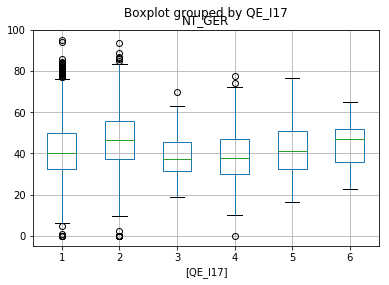

In [14]:
qe09 = pandas.DataFrame(ccomp, columns=['NT_GER', 'QE_I17'])
qe09.boxplot(by='QE_I17')

(0.9922361969947815, 1.5224135030772142e-15)
(0.9986683130264282, 0.018041541799902916)


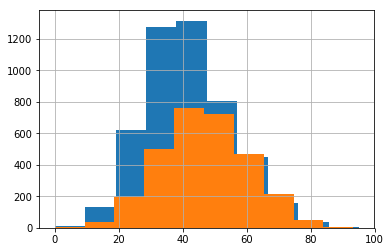

In [15]:
import scipy.stats as stats

print(stats.shapiro(qe09.NT_GER.loc[qe09.QE_I17 == 1]))

print(stats.shapiro(qe09.NT_GER.loc[qe09.QE_I17 == 2]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe09.NT_GER.loc[qe09.QE_I17 ==1].hist()
qe09.NT_GER.loc[qe09.QE_I17 ==2].hist()

In [16]:
#nota geral agrupada pela questão 05
tabela['CO_REGIAO_CURSO'] = tabela['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
tabela['NT_GER'].groupby(tabela['CO_REGIAO_CURSO']).describe()

,count,mean,std,min,25%,50%,75%,max
CO_REGIAO_CURSO,,,,,,,,
CO,33983.0,42.219242,14.034614,0.0,32.1,41.6,51.9,92.3
N,30173.0,39.985593,13.125199,0.0,30.6,39.4,48.8,93.2
NE,80074.0,42.983184,13.944656,0.0,33.0,42.4,52.4,98.1
S,97242.0,44.143470,14.138741,0.0,34.0,43.6,53.9,97.0
SE,208460.0,44.167560,14.146129,0.0,34.1,43.6,53.8,96.4


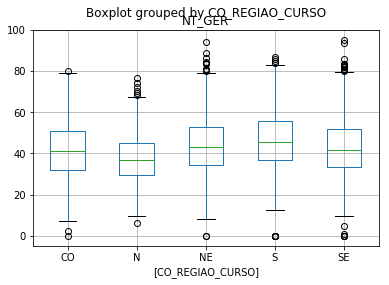

In [17]:
#Como verificar se a média dos alunos do campo QE_I05 para todos os alunos são realmente diferentes
qe05 = pandas.DataFrame(ccomp, columns=['NT_GER', 'CO_REGIAO_CURSO'])
qe05.boxplot(by='CO_REGIAO_CURSO')

(0.989157497882843, 0.0037451637908816338)
(0.9968446493148804, 0.0025786878541111946)


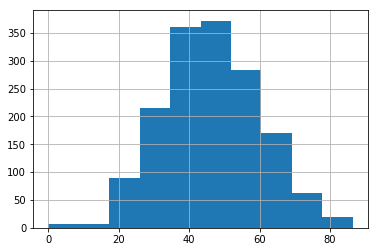

In [18]:
print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'N']))

print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'S']))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='S'].hist()


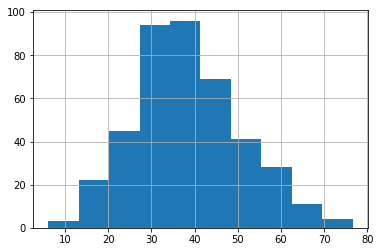

In [19]:
qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='N'].hist()